### Estimación rentabilidad de los clientes

In [2]:
#Libreria para manejo de datos en formato .csv
import pandas as pd
#Libreria para calculos matematicos
import numpy as np
#Librerias para graficar datos
import matplotlib.pyplot as plt
import seaborn as sns
#Libreria para modelo de regresion lineal
from sklearn.linear_model import LinearRegression

Exporte los datos en el excel como un archivo csv. Luego, importe los datos en un dataframe de pandas. Para ello, utilice la función read_csv().

In [3]:
df = pd.read_csv('GW-M1_HC1.csv', sep=',')

In [4]:
df

,Cliente,Productos,Rentabilidad
0,1,4,21
1,2,5,24
2,3,8,25
3,4,7,22
4,5,13,31
5,6,15,30
6,7,19,35
7,8,17,38
8,9,20,42
9,10,22,47


Para graficar los datos, hago uso de la librería seaborn, la cual permite graficar de forma más sencilla.

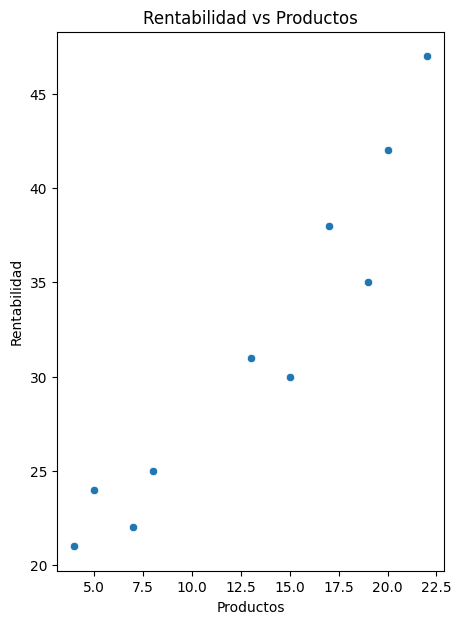

In [5]:
fig, ax = plt.subplots(figsize=(5, 7))
sns.scatterplot(x='Productos', y='Rentabilidad', data=df, ax=ax)
plt.title('Rentabilidad vs Productos')
plt.show()

Una forma de graficar la recta de regresión es con la función regplot() de seaborn.

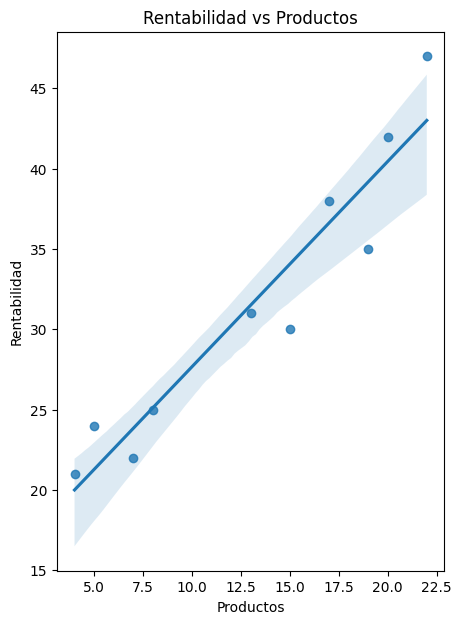

In [6]:
fig, ax = plt.subplots(figsize=(5, 7))
sns.regplot(x='Productos', y='Rentabilidad', data=df, ax=ax)
plt.title('Rentabilidad vs Productos')
plt.show()

Tambien podemos determinar la recta de reguesión con la función lmplot() de seaborn.

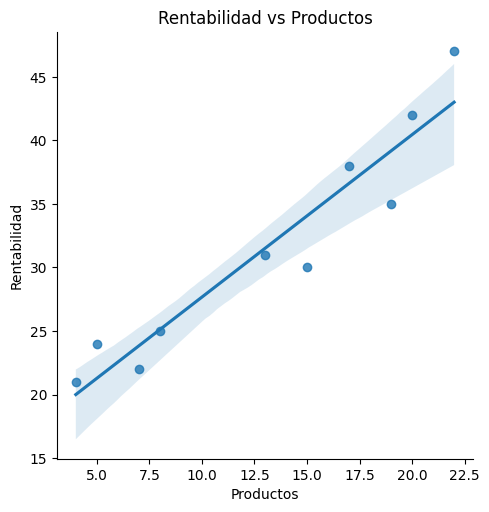

In [7]:
sns.lmplot(x='Productos', y='Rentabilidad', data=df)
plt.title('Rentabilidad vs Productos')
plt.show()

Se puede hacer uso de la libreira numpy para calcular la pendiente y la intersección de la recta de regresión.
La función polyfit() recibe como parámetros los datos de la variable independiente y los datos de la variable dependiente.
El parámetro deg indica el grado del polinomio que se ajustará a los datos. 
En este caso, el grado del polinomio es 1, por lo que se ajustará una recta a los datos.

In [8]:
#Ecuacion de la recta de regresion
pendiente, ordenada = np.polyfit(df['Productos'], df['Rentabilidad'], deg=1)
print('y = {}x + {}'.format(pendiente, ordenada))
#Esteticamente se puede escribir como:
print('y = {:.2f}x + {:.2f}'.format(pendiente, ordenada))

y = 1.2780612244897969x + 14.88520408163265
y = 1.28x + 14.89


In [9]:
#Calcular el valor de R2 (coeficiente de determinacion)
R2 = 1 - np.sum((df['Rentabilidad'] - (pendiente*df['Productos'] + ordenada))**2)/np.sum((df['Rentabilidad'] - df['Rentabilidad'].mean())**2)
print('R2 = {}'.format(R2))
#Redondeando a 2 decimales
print('R2 = {:.2f}'.format(R2))

R2 = 0.9063109320161185
R2 = 0.91


A continuación, se muestra como crear un modelo de regresión lineal utilizando la libreria sklearn.

In [10]:
#Crear el modelo de regresion lineal
modelo = LinearRegression()
#Entrenar el modelo
modelo.fit(df[['Productos']], df['Rentabilidad'])

LinearRegression()

Una vez que se tiene el modelo, entrenado con las columnas del dataframe, podemos obtener las metricas solicitadas.

In [11]:
#Obtener los coeficientes de la recta de regresion
print('y = {:.2f}x + {:.2f}'.format(modelo.coef_[0], modelo.intercept_))
#Obtener el coeficiente de determinacion R2
print('R2 = {:.2f}'.format(modelo.score(df[['Productos']], df['Rentabilidad'])))

y = 1.28x + 14.89
R2 = 0.91


Podemos usar el modelo para predecir el valor de la variable dependiente, en este caso, la rentabilidad de los clientes.

In [12]:
prediccion = modelo.predict(df[['Productos']])

In [13]:
#Añadir la columna de predicciones al dataframe y calcular los residuos
df['Prediccion'] = prediccion
df['Residuos'] = df['Rentabilidad'] - df['Prediccion']

In [14]:
df

,Cliente,Productos,Rentabilidad,Prediccion,Residuos
0,1,4,21,19.997449,1.002551
1,2,5,24,21.275510,2.724490
2,3,8,25,25.109694,-0.109694
3,4,7,22,23.831633,-1.831633
4,5,13,31,31.500000,-0.500000
5,6,15,30,34.056122,-4.056122
6,7,19,35,39.168367,-4.168367
7,8,17,38,36.612245,1.387755
8,9,20,42,40.446429,1.553571
9,10,22,47,43.002551,3.997449


In [15]:
#Obtener el coeficiente de correlación
corr = df['Productos'].corr(df['Rentabilidad'])
print('r = {:.2f}'.format(corr))
#Tambien se puede obtener el coeficiente de correlacion con numpy
corr = np.corrcoef(df['Productos'], df['Rentabilidad'])[0, 1]
print('r = {:.2f}'.format(corr))

r = 0.95
r = 0.95


In [16]:
#Obtener los parámetros de la recta de regresión
pendiente, ordenada = np.polyfit(df['Productos'], df['Rentabilidad'], deg=1)
print('y = {:.2f}x + {:.2f}'.format(pendiente, ordenada))

y = 1.28x + 14.89


In [17]:
#Obtener los residuos o error total
residuos = df['Rentabilidad'] - (pendiente*df['Productos'] + ordenada)
print('Residuos = {}'.format(residuos))
#Para poder calcular el error total se debe elevar al cuadrado cada uno de los residuos y sumarlos.
#Para ello se puede utilizar la funcion sum() de numpy
print('Error total = {:.2f}'.format(np.sum(residuos**2)))

Residuos = 0    1.002551
1    2.724490
2   -0.109694
3   -1.831633
4   -0.500000
5   -4.056122
6   -4.168367
7    1.387755
8    1.553571
9    3.997449
dtype: float64
Error total = 66.19


In [18]:
#Estimar para un cliente de 16 productos la rentabilidad esperable
#Lo podemos hacer evaluando el valor de la recta de regresion en el punto x=16
print('Rentabilidad esperable = {:.2f}'.format(pendiente*16 + ordenada))
#O bien, utilizando el modelo de regresion lineal
x = pd.DataFrame({'Productos': [16]})
print('Rentabilidad esperable = {:.2f}'.format(modelo.predict(x)[0]))

Rentabilidad esperable = 35.33
Rentabilidad esperable = 35.33


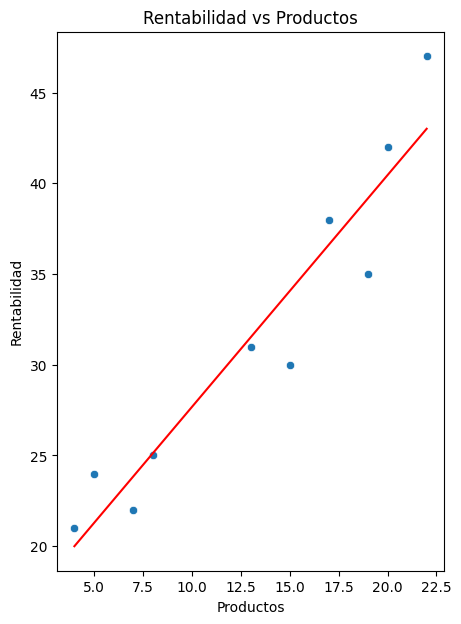

In [19]:
#Representar gráficamente la recta de ajuste que produce el ajuste de la regresión lineal
fig, ax = plt.subplots(figsize=(5, 7))
sns.scatterplot(x='Productos', y='Rentabilidad', data=df, ax=ax)
sns.lineplot(x='Productos', y='Prediccion', data=df, ax=ax, color='red')
plt.title('Rentabilidad vs Productos')
plt.savefig('regresion_lineal.png', dpi=150)
plt.show()